In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
images = digits.data.values.reshape(-1, 28, 28)
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)


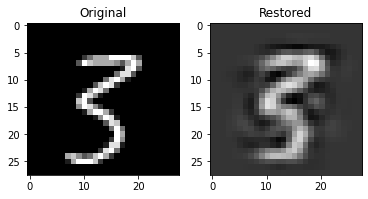

In [4]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

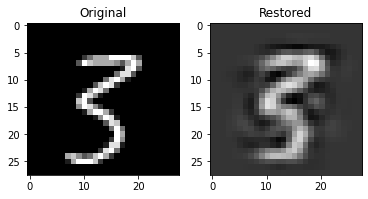

In [7]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

 Определите, сколько нужно взять главных компонент, чтобы объяснить 99%, 95%, 90%, и 85% исходной дисперсии.

In [16]:

pca = PCA(n_components=50)
pca99=PCA(n_components=0.99)
pca95=PCA(n_components=0.95)
pca90=PCA(n_components=0.90)
pca85=PCA(n_components=0.85)

a = pca99.inverse_transform(pca99.fit_transform(digits.data.astype(float)))
b = pca95.inverse_transform(pca95.fit_transform(digits.data.astype(float)))
c = pca90.inverse_transform(pca90.fit_transform(digits.data.astype(float)))
d = pca85.inverse_transform(pca85.fit_transform(digits.data.astype(float)))
print("кол-во компонент:",pca99.n_components_,pca95.n_components_,pca90.n_components_,pca85.n_components_)


кол-во компонент: 331 154 87 59



Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

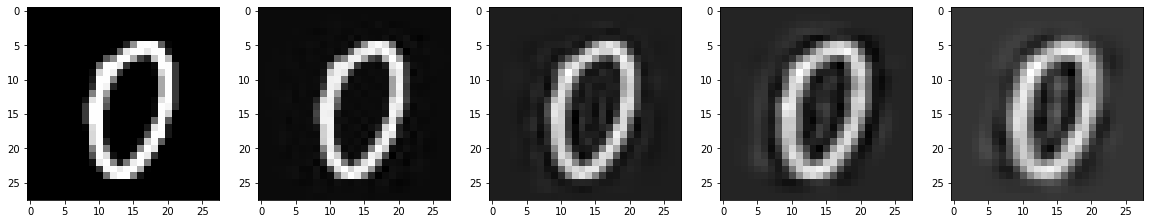

In [33]:
fig, ax = plt.subplots(1, 5,figsize=(20, 30))
i=1000
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(a[i].reshape(28, 28), cmap='gray')
ax[2].imshow(b[i].reshape(28, 28), cmap='gray')
ax[3].imshow(c[i].reshape(28, 28), cmap='gray')
ax[4].imshow(d[i].reshape(28, 28), cmap='gray')